### Парная линейная регрессия
#### Цель работы
Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

#### Содержание работы
Загрузить данные из тектовых файлов.  
Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.  
Оценить на графике качество построенной модели.  
Построить кривые обучения.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)["0"]
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)["0"]

In [12]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

In [13]:
x.shape, y.shape

((20,), (20,))

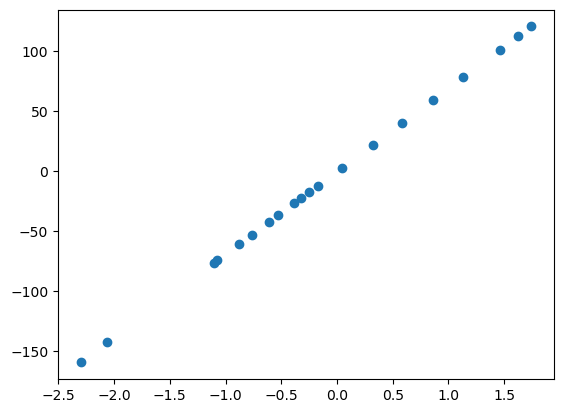

In [14]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [21]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(Y)) 
    
    def fit(self, X, Y):  
        alpha = 0.5
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [22]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153397


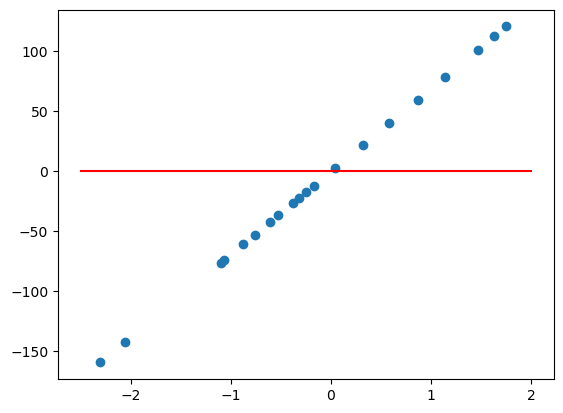

In [17]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [23]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 432.6221263403898


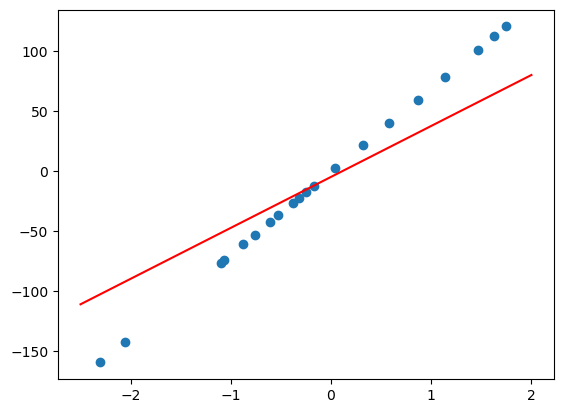

In [24]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [25]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = self.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [26]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.7769753060572152e-06


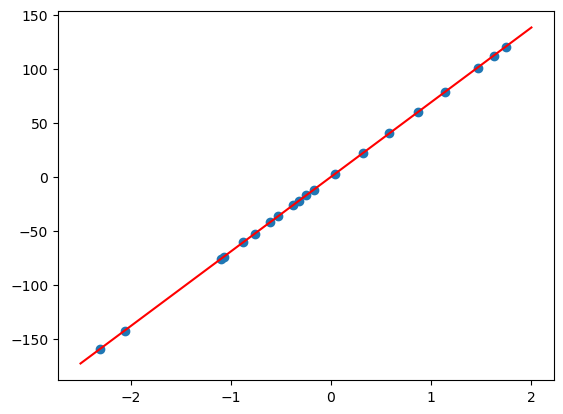

In [27]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

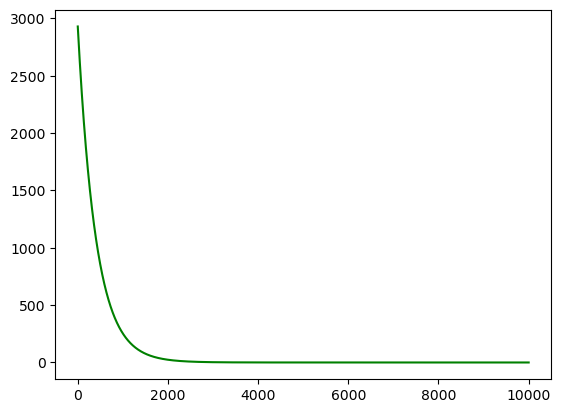

In [28]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

#### Дополнительное

In [42]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=10, accuracy=0.01, max_steps=5000):
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(100):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            if new_err > old_err: #для случая, когда мы выпрыгиваем или перепрыгиваем минимум при слишком большом альфа
                alpha /= 2
                self.__init__()
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        return steps, errors

In [43]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 5.2465009910112536e-15


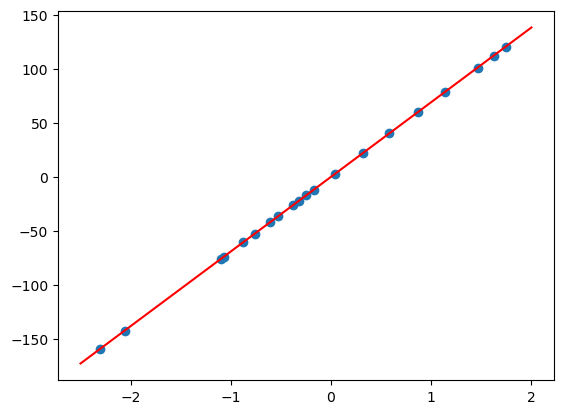

In [44]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

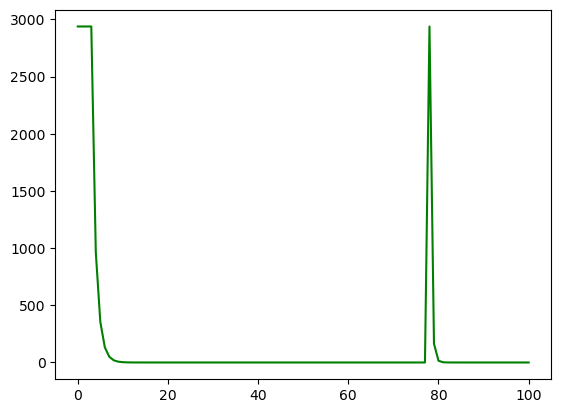

In [45]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

In [62]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self, max_iter=10000):
        self.b0 = 0
        self.b1 = 0
        self.max_iter = max_iter
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [0, ], [self.error(X, Y), ]
        step = 0        
        for _ in range(self.max_iter):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1 
               
            new_err = self.error(X, Y)
            old_err = errors[-1]
            
            if old_err - new_err < 0.0001: # для остановки обучения, если обучилось достаточно
                break
            
            step += 1            
            steps.append(step)
            errors.append(self.error(X, Y))
        else:
            print('Warning!')
        return steps, errors

In [63]:
hyp = Model(max_iter=50000)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 0.04992531975655815


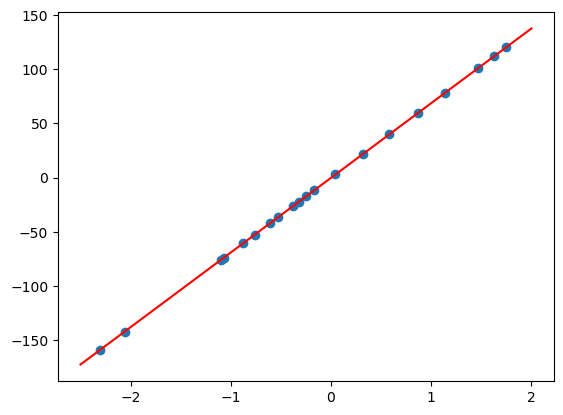

In [64]:
X0 = np.linspace(-2.5, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

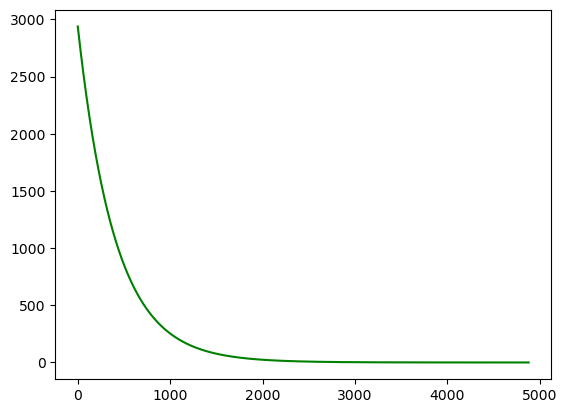

In [65]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()